In [1]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression
import re
from sklearn.model_selection import train_test_split

In [31]:
def get_data(file_name):
    print(file_name)
    df = pd.read_csv(file_name)

    df_date = df['Date']
    df_time = df['Time']
    df['Date'] = df_date.str.replace("/", "-")
    df['Time'] = df_time.str.replace(";", ".")
    df['DateTime'] = df['Date'] + ' ' + df['Time']
    df['DateTime'] = pd.to_datetime(df['DateTime'])
    
    X = df['DateTime'].values.reshape(-1, 1)  # values converts it into a numpy array
    y = df['Program:MainProgram\Seal1Temp'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
    plt.figure(figsize=(15,4))
    plt.plot(X, y)

    dif = df['DateTime'].max() - df['DateTime'].min()
    total_produced = df.shape[0]
    total_fail = df[df['Program:MainProgram\BadSeal1'] > 0].shape[0]
    
    print("Time", dif.total_seconds())
    print("Produced", total_produced)
    print("Production Rate", total_produced / dif.total_seconds())
    print("Fail Rate", total_fail / total_produced)
    
    print(df.mean(numeric_only=True))
    print(df.median(numeric_only=True))
    print(df.max(numeric_only=True))
    
    plt.show()

SealerMachine1_cleaned.csv
Time 908.0
Produced 1817
Production Rate 2.001101321585903
Fail Rate 0.2212438084755091
Program:MainProgram\Sealer1UseCount.ACC    1828.094662
Program:MainProgram\BadSeal1                  0.221244
Program:MainProgram\Seal1Temp               246.647221
dtype: float64
Program:MainProgram\Sealer1UseCount.ACC    1831.0
Program:MainProgram\BadSeal1                  0.0
Program:MainProgram\Seal1Temp               254.0
dtype: float64
Program:MainProgram\Sealer1UseCount.ACC    1859
Program:MainProgram\BadSeal1                  1
Program:MainProgram\Seal1Temp               429
dtype: int64


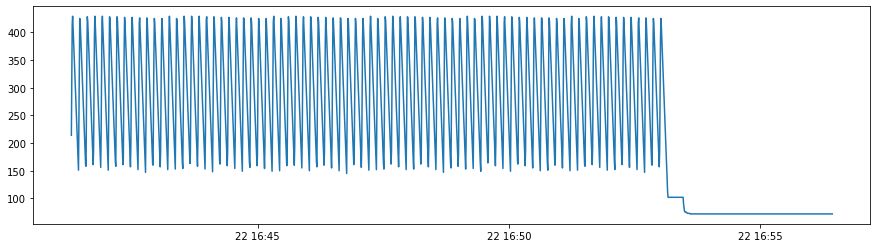

SealerMachine2_cleaned.csv
Time 824.0
Produced 1649
Production Rate 2.0012135922330097
Fail Rate 0.0667070952092177
Program:MainProgram\Sealer1UseCount.ACC    1220.659187
Program:MainProgram\BadSeal1                  0.066707
Program:MainProgram\Seal1Temp               209.255306
dtype: float64
Program:MainProgram\Sealer1UseCount.ACC    1221.0
Program:MainProgram\BadSeal1                  0.0
Program:MainProgram\Seal1Temp               187.0
dtype: float64
Program:MainProgram\Sealer1UseCount.ACC    1248
Program:MainProgram\BadSeal1                  1
Program:MainProgram\Seal1Temp               401
dtype: int64


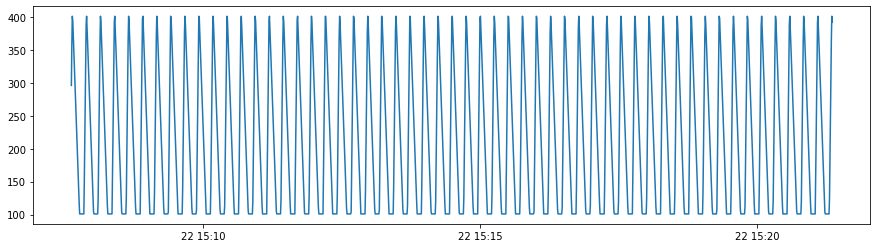

In [32]:
get_data("SealerMachine1_cleaned.csv")
get_data("SealerMachine2_cleaned.csv")